In [10]:
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

data = pd.read_csv('./eda01_complete.csv')
data.head(2)

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_ip_present,url_entropy,html_num_tags('script'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,4.260333,7.0,0.0,0.0,0.0,malicious
1,49.0,0.0,30.0,19.0,19.0,4.0,0.0,4.251365,8.0,19.0,1.0,4.0,malicious


#### (1)수치형 변수 -> 수치형변수
수치형 변수 (url)
- url_len : URL 길이
- url_num_hyphens_dom : URL내 '-'(하이픈) 개수
- url_path_len : URL의 경로 길이
- url_domain_len : URL의 도메인 길이
- url_hostname_len : URL의 hostname 길이
- url_num_dots : URL내 '.'(닷) 개수
- url_entropy : URL 복잡도

-----------------------------------------------------

수치형 변수 (html tag)
- html_num_tags('script') : HTML내 'script' 태그 개수
- html_num_tags('div') : HTML내 'div' 태그 개수
- html_num_tags('form') : HTML내 'form' 태그 개수
- html_num_tags('a') : HTML내 'a' 태그 개수
- html_num_tags('applet') : HTML내 'applet' 태그 개수

------------------------------------------------------

target:
- 수치형변수
    - label_binary
- 범주형 변수
    - label


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  1239 non-null   float64
 1   url_num_hyphens_dom      1239 non-null   float64
 2   url_path_len             1238 non-null   float64
 3   url_domain_len           1239 non-null   float64
 4   url_hostname_len         1239 non-null   float64
 5   url_num_dots             1239 non-null   float64
 6   url_ip_present           1239 non-null   float64
 7   url_entropy              1239 non-null   float64
 8   html_num_tags('script')  1239 non-null   float64
 9   html_num_tags('div')     1239 non-null   float64
 10  html_num_tags('form')    1239 non-null   float64
 11  html_num_tags('a')       1239 non-null   float64
 12  label                    1239 non-null   object 
 13  label_binary             1239 non-null   int64  
dtypes: float64(12), int64(1)

In [16]:
data['url_path_len'].fillna(0, inplace=True)

In [17]:
# label의 각 데이터 0과 1로 변환 수행
data['label_binary'] = data['label'].map({'malicious': 1, 'benign' : 0})

PearsonRResult(statistic=-0.0012028456657361478, pvalue=0.9662621248731009)
PearsonRResult(statistic=0.3908004902227469, pvalue=1.7573902681234656e-46)
PearsonRResult(statistic=-0.25566893312079697, pvalue=6.091938660863103e-20)
PearsonRResult(statistic=0.4656155839067406, pvalue=1.1152298966446455e-67)
PearsonRResult(statistic=0.4779317194054923, pvalue=1.0488009698100677e-71)
PearsonRResult(statistic=-0.48195656937774384, pvalue=4.663664635250011e-73)
PearsonRResult(statistic=0.014126651093994622, pvalue=0.6193491502156578)


<Figure size 2000x800 with 0 Axes>

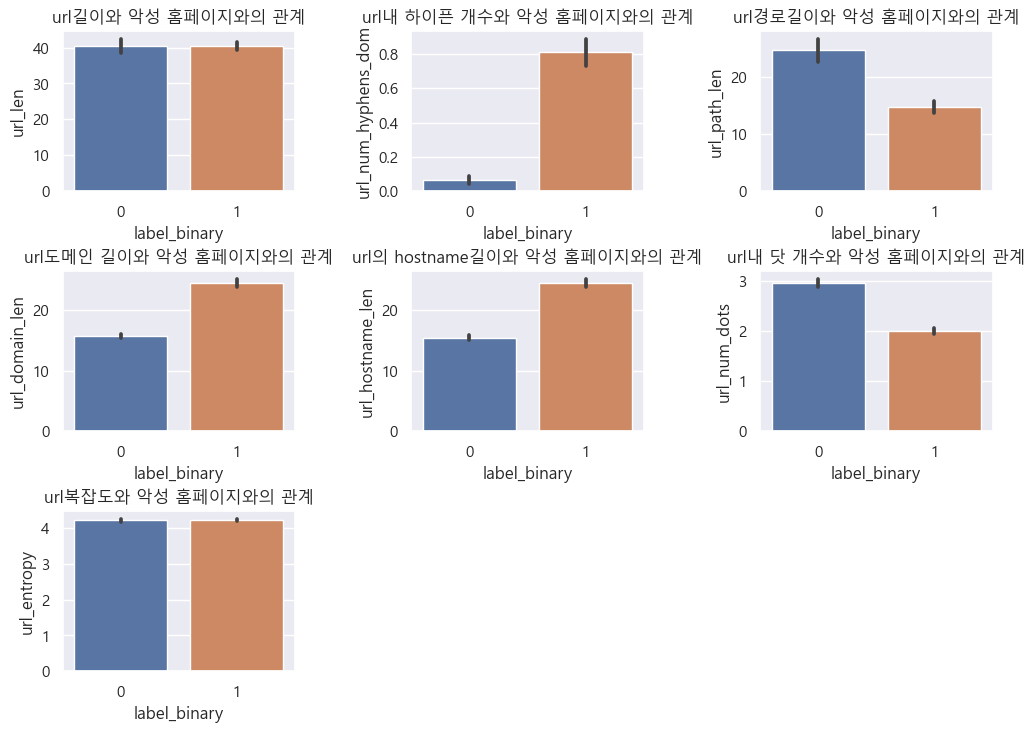

In [26]:
plt.figure(figsize=(20, 8))
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')


plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
sns.barplot(y='url_len', x='label_binary', data=data)
print(spst.pearsonr(data['url_len'],data['label_binary']))
plt.title("url길이와 악성 홈페이지와의 관계")

plt.subplot(3, 3, 2)
sns.barplot(y='url_num_hyphens_dom', x='label_binary', data=data)
print(spst.pearsonr(data['url_num_hyphens_dom'],data['label_binary']))
plt.title("url내 하이픈 개수와 악성 홈페이지와의 관계")

plt.subplot(3, 3, 3)
sns.barplot(y='url_path_len', x='label_binary', data=data)
print(spst.pearsonr(data['url_path_len'],data['label_binary']))
plt.title("url경로길이와 악성 홈페이지와의 관계")


plt.subplot(3, 3, 4)
sns.barplot(y='url_domain_len', x='label_binary', data=data)
print(spst.pearsonr(data['url_domain_len'],data['label_binary']))
plt.title("url도메인 길이와 악성 홈페이지와의 관계")


plt.subplot(3, 3, 5)
sns.barplot(y='url_hostname_len', x='label_binary', data=data)
print(spst.pearsonr(data['url_hostname_len'],data['label_binary']))
plt.title("url의 hostname길이와 악성 홈페이지와의 관계")


plt.subplot(3, 3, 6)
sns.barplot(y='url_num_dots', x='label_binary', data=data)
print(spst.pearsonr(data['url_num_dots'], data['label_binary']))
plt.title("url내 닷 개수와 악성 홈페이지와의 관계")

plt.subplot(3, 3, 7)
sns.barplot(y='url_entropy', x='label_binary', data=data)
print(spst.pearsonr(data['url_entropy'], data['label_binary']))
plt.title("url복잡도와 악성 홈페이지와의 관계")

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.5, hspace=0.5)

plt.show()

- 하이픈 개수가 많을수록 악성홈페이지일 확률이 높다.
- url경로길이가 15이하의 경우 악성홈페이지일 확률이 높다.
- url도메인 길이와 hostname의 길이가 20이상일 수록 악성홈페이지일 확률이 높다.
- url내 dot 갯수가 2이면, 악성홈페이지일 확률이 높다.
-----------------------------------

- url길이와 url복잡도의 경우 피어슨 상관계수 <= 0.05가 아니다. 생각하지 않아야할 변수임을 알 수 있다.

#### (2) 수치형 변수 -> 범주형 변수

In [29]:
def eda_num_catg(df, var, bins=20):
        display(df[[var]].describe().T)
        plt.figure(figsize = (6,8))
        plt.subplot(2,1,1)
        sns.kdeplot(x = var, data=df, hue='label', multiple='fill')
        plt.axhline(df['label_binary'].mean(), color='r')

        plt.subplot(2,1,2)
        sns.histplot(x=var, data=df, bins=20, hue='label', multiple='fill')
        plt.axhline(df['label_binary'].mean(), color='r')

        plt.tight_layout()
        plt.show()

#### (1) url_len

,count,mean,std,min,25%,50%,75%,max
url_len,1239.0,40.407587,18.73545,9.0,27.0,37.0,50.0,99.0


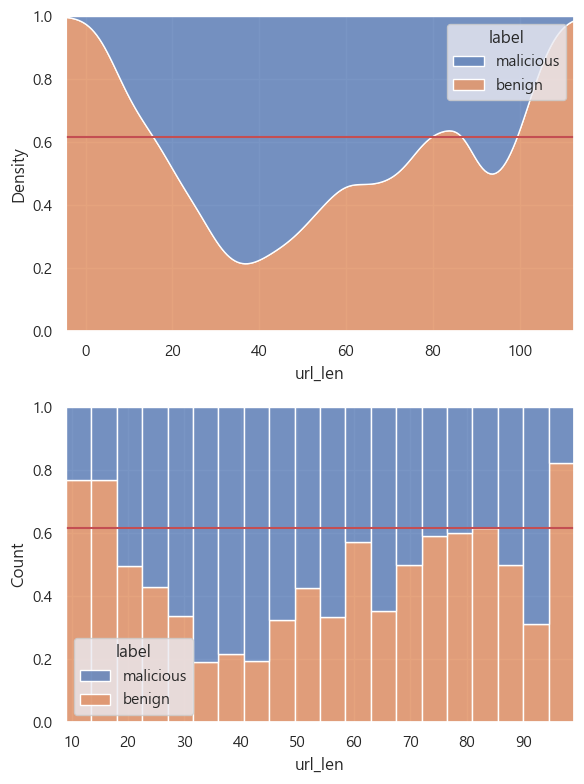

In [30]:
eda_num_catg(data, 'url_len')

- 20~70의 길이를 가지면 악성홈페이지일 확률이 높다.

#### (2) url_num_hyphens_dom

,count,mean,std,min,25%,50%,75%,max
url_num_hyphens_dom,1239.0,0.523002,0.931886,0.0,0.0,0.0,1.0,4.0


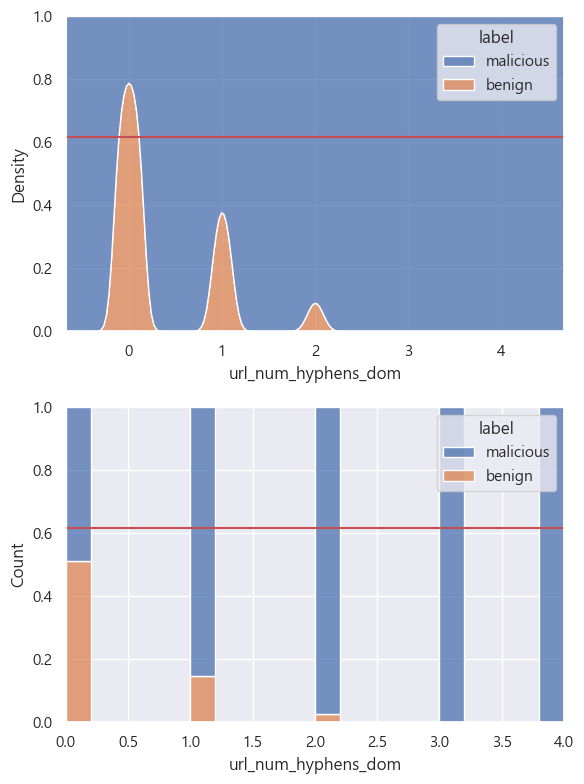

In [31]:
eda_num_catg(data, 'url_num_hyphens_dom')

- 하이픈이 없다면, 악성홈페이지일 확률이 높다.

#### (3) url_path_len : URL의 경로 길이

,count,mean,std,min,25%,50%,75%,max
url_path_len,1239.0,18.561743,18.809027,0.0,1.0,11.0,30.0,86.0


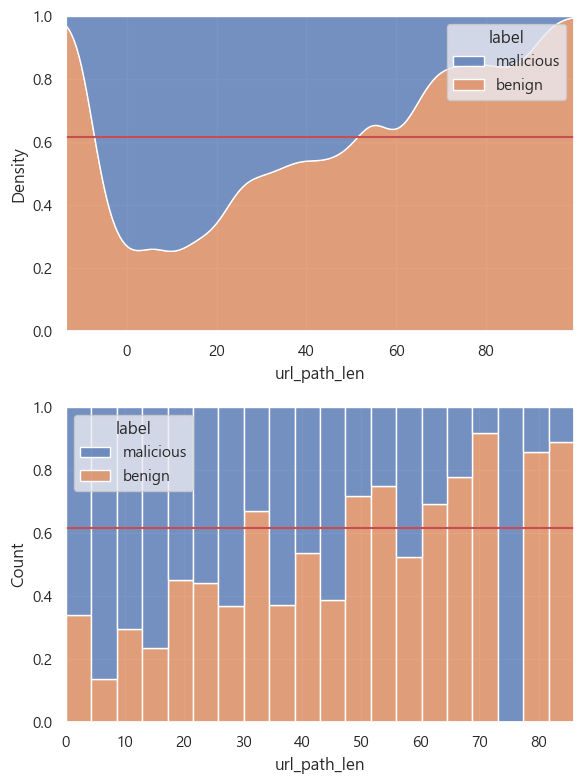

In [32]:
eda_num_catg(data, 'url_path_len')

- url_path_len이 대략 0~45까지는 악성홈페이지일 확률이 높다.

#### (4) url_domain_len : URL의 도메인 길이

,count,mean,std,min,25%,50%,75%,max
url_domain_len,1239.0,21.150121,9.132576,4.0,15.0,18.0,26.0,49.0


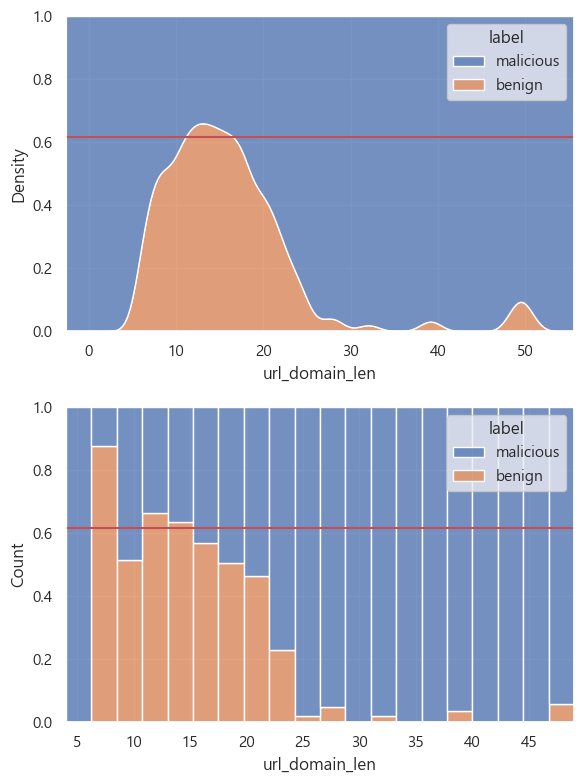

In [33]:
eda_num_catg(data, 'url_domain_len')

- 5~25사이의 데이터는 정상 홈페이지이다. 그 외는 악성홈페이지임을 확인할 수 있다.

#### (5) url_hostname_len : URL의 hostname 길이

,count,mean,std,min,25%,50%,75%,max
url_hostname_len,1239.0,21.031477,9.21112,4.0,14.0,18.0,26.0,49.0


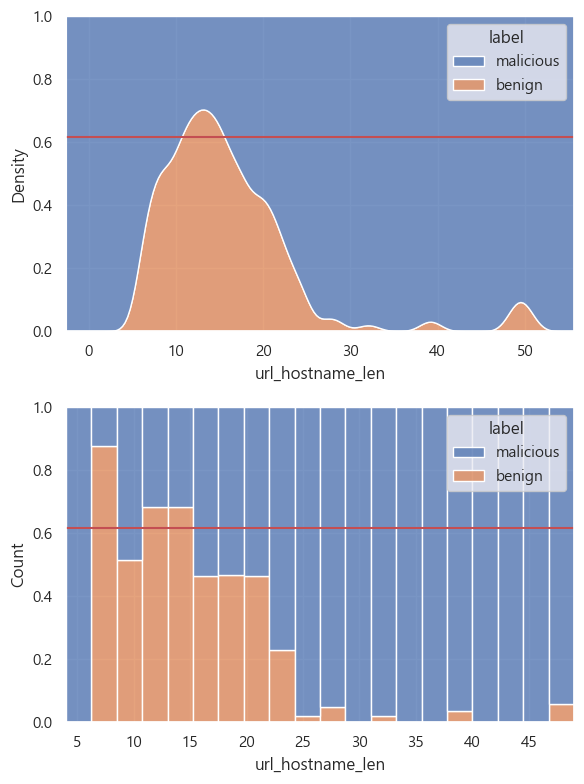

In [34]:
eda_num_catg(data, 'url_hostname_len')

- url_domain_len과 거의 유사한 결과를 보인다. 단변량 분석때 상관관계 분석을 할 때 매우 높은 유사도를 보이고 있기 때문에 domain피처만 남기고 해당 피처는 제거하는 작업을 수행하겠다.

#### (6) url_num_dots : URL내 '.'(닷) 개수

,count,mean,std,min,25%,50%,75%,max
url_num_dots,1239.0,2.367232,0.973771,1.0,2.0,2.0,3.0,4.0


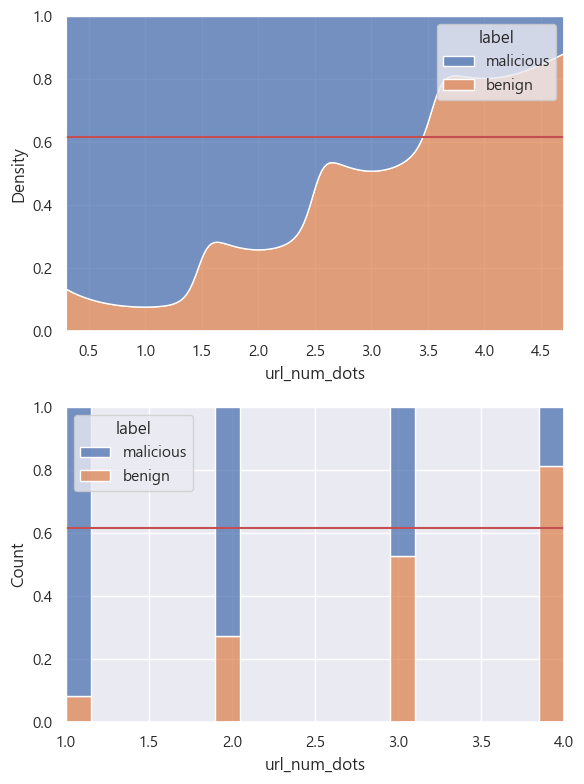

In [35]:
eda_num_catg(data, 'url_num_dots')

- 3이하의 dot갯수를 가질 때 악성홈페이지일 확률이 높다.

#### (7) url_entropy : URL 복잡도

,count,mean,std,min,25%,50%,75%,max
url_entropy,1239.0,4.215856,0.349833,3.077324,4.025102,4.208966,4.448677,5.326578


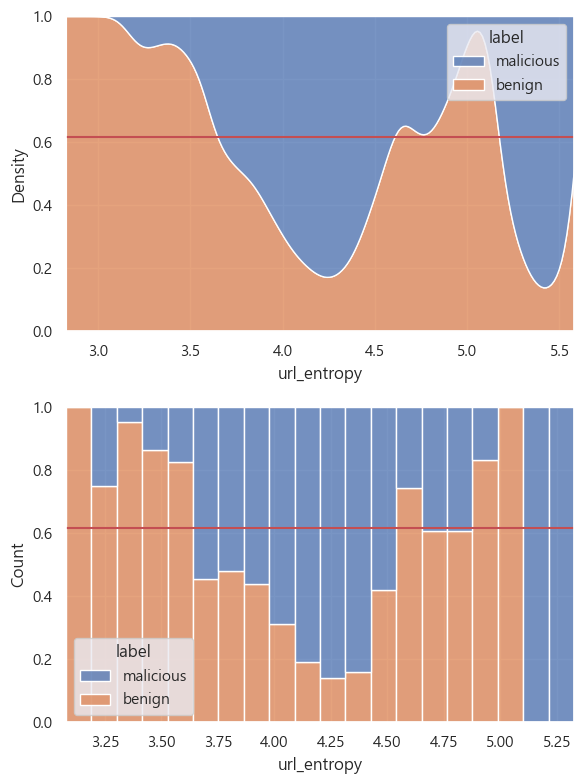

In [36]:
eda_num_catg(data, 'url_entropy')

- 3~4.5 사이의 복잡도를 가지면, 악성홈페이지일 확률이 높다.
- 5.0이상의 복잡도를 가지면, 악성홈페이지일 확률이 높다.

### (3) 범주형 변수  -> 범주형 변수

#### url_ip_present: URL내 IP표시 여부

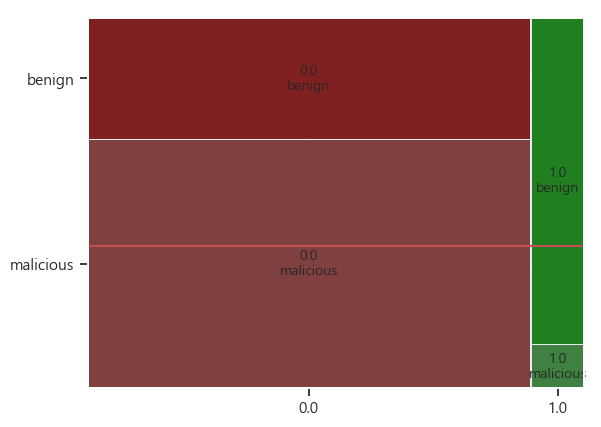

In [40]:
mosaic(data, ['url_ip_present', 'label'])
plt.axhline(1-data['label_binary'].mean(), color='r')
plt.show()

label             benign  malicious
url_ip_present                     
0.0             0.327027   0.672973
1.0             0.883721   0.116279


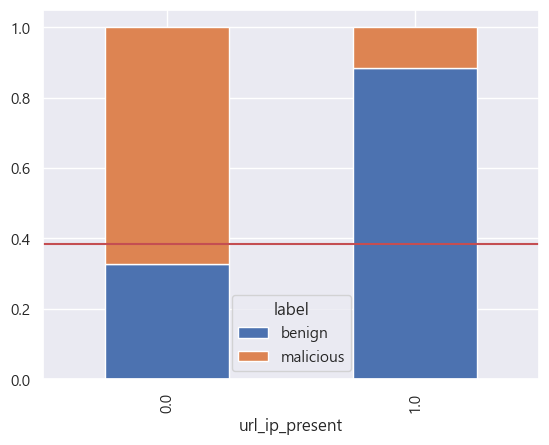

In [41]:
temp = pd.crosstab(data['url_ip_present'], data['label'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['label_binary'].mean(), color = 'r')
plt.show()

- url_ip가 존재할때, 정상 사이트일 확률이 높다는 것을 확인할 수 있다.
- 반면, url_ip가 존재하지 않을 때, 악성 사이트일 확률이 높다는 것을 확인할 수 있다.

In [42]:
table = pd.crosstab(data['label'], data['url_ip_present'])
print(table)
print('-' * 50)

spst.chi2_contingency(table)

url_ip_present  0.0  1.0
label                   
benign          363  114
malicious       747   15
--------------------------------------------------


(148.92474157132986,
 2.978455372550946e-34,
 1,
 array([[427.33656174,  49.66343826],
        [682.66343826,  79.33656174]]))

- 카이제곱 검정 결과 매우 유의미하다는 통계 결과가 나왔다.

In [44]:
data.drop('url_hostname_len', axis=1, inplace=True)

#### train데이터, test데이터 분리

In [46]:
# 1.label데이터는 drop
data.drop('label', axis=1, inplace=True)

In [48]:
# 2. label_binary 칼럼의 이름을 label로 rename
data.rename(columns={'label_binary': 'label'}, inplace=True)

In [54]:
data.to_csv('./data_eda02_final.csv')